<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Kalman_Filters_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pykalman
!pip install yfinance

     |████████████████████████████████| 228 kB 5.1 MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=70e2336816761800490cb710869d6c3360e364f8777dd070178f2f94c9badd7c
  Stored in directory: /root/.cache/pip/wheels/6a/04/02/2dda6ea59c66d9e685affc8af3a31ad3a5d87b7311689efce6
Successfully built pykalman
     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=ccc4c3706bb0af2cc04ef50625bf43c7dceefadd3908e187007599fe20e6f8a7
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#Importing dependencies#
from pykalman import KalmanFilter
import numpy as np
import pylab as pl
import pandas as pd
import yfinance as yf
from scipy import poly1d
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


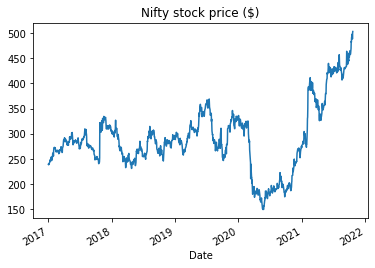

In [22]:
#ticker= yf.Ticker('TSLA')
nifty_df = yf.download('sbin.ns',start='2017-01-01')
nifty_df['Adj Close'].plot(title='Nifty stock price ($)');


In [23]:
nifty_df = yf.download('^nsei',start='2014-01-01',progress=False)


In [24]:
df = nifty_df[['Adj Close']]


mean 15660.632232882203


Text(0.5, 0, 'Days')

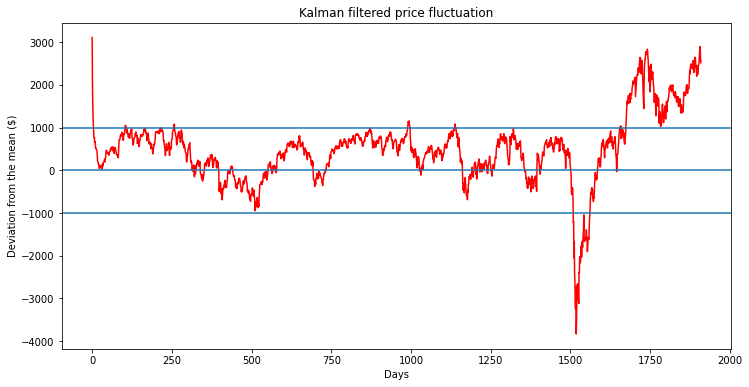

In [25]:
f = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance = 1,
                  transition_covariance = 0.0001)
mean, cov = f.filter(df['Adj Close'].values)
mean, std = mean.squeeze(), np.std(cov.squeeze())
print(f'mean {mean[-1]}')


plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'].values - mean, 'red', lw=1.5)

plt.axhline(y=0)
plt.axhline(y=1000)
plt.axhline(y=-1000)
plt.title("Kalman filtered price fluctuation")
plt.ylabel("Deviation from the mean ($)")
plt.xlabel("Days")

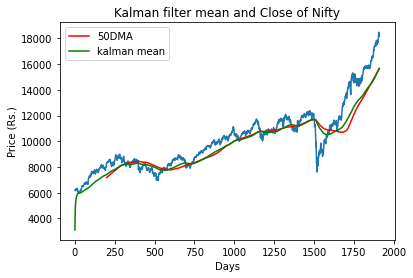

In [32]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(nifty_df['Close'].values)
ax.plot(nifty_df['Close'].rolling(window=200).mean().values,color='red',label='50DMA')
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
plt.title("Kalman filter mean and Close of Nifty")
plt.ylabel("Price (Rs.)")
plt.xlabel("Days")
ax.plot(mean,color='green',label='kalman mean')
plt.legend(loc='upper left')
plt.show()

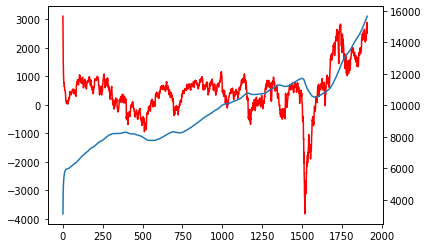

In [27]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df['Adj Close'].values - mean, 'red', lw=1.5)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(mean)
plt.show()

In [28]:
nifty_mean=df['Adj Close'].mean()

In [29]:
states, observations = f.sample(
    n_timesteps=len(df),
    initial_state=nifty_mean
)

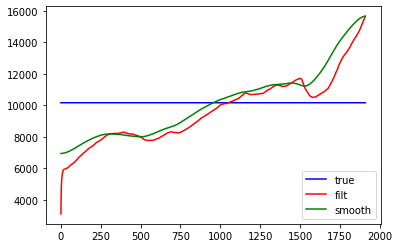

In [30]:
filtered_state_estimates = f.filter(df['Adj Close'].values)[0]
smoothed_state_estimates = f.smooth(df['Adj Close'].values)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower right'
)